In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')

In [3]:
X = mnist['data']
y = mnist['target']

In [4]:
X_bk = (X > 0).astype(np.int8)
X_bk

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_bk, y, random_state=42, test_size=0.2)

In [6]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred

array(['8', '4', '8', ..., '2', '7', '1'], dtype=object)

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.96      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.97      0.97      1295
           5       0.98      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.95      0.95      0.95      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



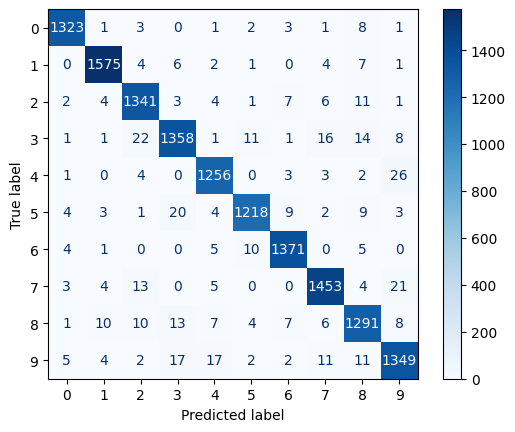

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

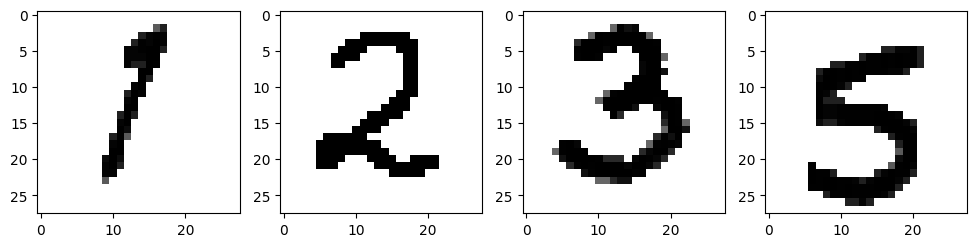

In [9]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

number_imgs = []

number_imgs.append(Image.open('./numbers/one.png'))
number_imgs.append(Image.open('./numbers/two.png'))
number_imgs.append(Image.open('./numbers/three.png'))
number_imgs.append(Image.open('./numbers/five.png'))

fig, ax = plt.subplots(1, len(number_imgs), figsize=(12,8))

for i, number_img in enumerate(number_imgs):
    ax[i].imshow(number_img)

plt.show()

In [10]:
numbers = []

for number_img in number_imgs:
    number = np.asarray(
        ImageOps.invert(
            number_img.convert('L')))\
                .ravel()
    numbers.append(number)

numbers = np.asarray(numbers)
numbers.shape

(4, 784)

In [11]:
rf.predict(numbers)

c:\Users\otavi\anaconda3\envs\tf\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['1', '2', '3', '5'], dtype=object)

In [12]:
rf.predict_proba(numbers)[0].tolist()

c:\Users\otavi\anaconda3\envs\tf\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0.01, 0.28, 0.19, 0.12, 0.0, 0.11, 0.24, 0.01, 0.03, 0.01]

In [13]:
import joblib, gzip

joblib.dump(rf, '../webapp/model.joblib', compress=('gzip', 3))

['../webapp/model.joblib']